# Solutions - Homework 1

## Question 1: Inverse Method for exponentials

1. Use the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), to generate random deviates from an exponential distribution with mean $\mu$. $\mu$ and the number of random deviates should be arguments to your function. This is Example 22.3.1 in Lange. Be aware that there are two standard methods for parameterizing the exponential.
2. For some particular $\mu$ of your choosing, make a histogram of the random deviates and plot the appropriate exponential density curve on top of the histogram to confirm that the generator is working. Verify that the mean and standard deviation are what they should be.
3. Compare the speed of your exponential generator to the language generator (rexp in R, numpy.random.exponential in python). Try to make your generator computationally competitive with the built in generator, by avoiding for loops and other slow code.

In [1]:
## question 1
import numpy as np
from numpy import random

In [4]:
np.log(10.0)

2.3025850929940459

In [26]:
def exp_rand(n,mu):
    return -mu*np.log(np.random.uniform(size=n))

In [30]:
## question 2
n = 100000
mu = 2.0
x = exp_rand(n,mu)

In [34]:
print(np.mean(x))
print(np.std(x))

2.01127922867
2.00062862736


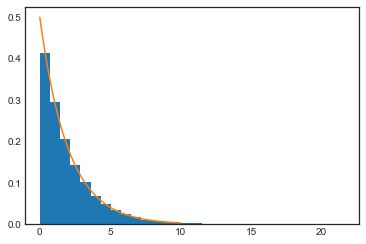

In [41]:
## see https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)
plt.hist(x,bins=30,normed=True);

z = np.linspace(0, 10, 1000)
y = np.sin(z[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
y = np.exp(-z/mu)/mu
lines = plt.plot(z, y)


In [50]:
## question 3
n = 100000
%timeit y = np.random.exponential(mu,n)

4.16 ms ± 71.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
%timeit y = exp_rand(n,mu)

3.62 ms ± 46.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Question 2: Simulation Study of the LLN and CLT

1. Create a $n \times p$ matrix $X$ with $n=100$ and $p=1000$ and each entry $1$ with probability $0.5$ and $0$ with probability $0.5$. If you would like some intuition for this simulation consider this: Suppose 1/2 of all voters support proposition A. We conduct 100 surveys (number of rows of X) each with 1000 voters (number of columns = sample size of poll). A voter responds 1 if they support A, 0 if they do not support A. Note on Confusing Notation: The sample size of each poll is $p$. Usually $n$ is sample size.
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $j$ entry of $Y$ is
\begin{equation*}
Y_{ij} = \frac{1}{j} \sum_{k=1}^j X_{ik}
\end{equation*}
Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y--axis) against the column number (on the x--axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 10th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. What is this simulation showing?

In [67]:
## question 1
n = 100
p = 1000
X = np.random.binomial(n=1,p=0.5,size=n*p)
X = X.reshape((n, p))
X


array([[0, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 0, 1]])

In [69]:
## question 2
Y = np.zeros(n*p).reshape((n,p))

In [79]:
for ii in np.arange(n):
    for jj in np.arange(p):
        Y[ii,jj] = np.mean(X[ii,:(jj+1)])

In [107]:
## maybe faster, perhaps harder to understand
Y2 = np.cumsum(X,axis=1)/(np.arange(p)+1)

In [110]:
np.sum(np.abs(Y - Y2)) ## are they the same

0.0

In [84]:
samp_size = np.arange(p) + 1

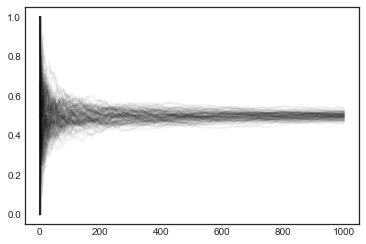

In [90]:
lines = plt.plot(samp_size, Y.T,alpha=.05,color='black')

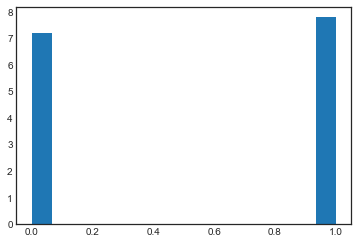

In [100]:
plt.hist(Y[:,0],bins=15,normed=True);

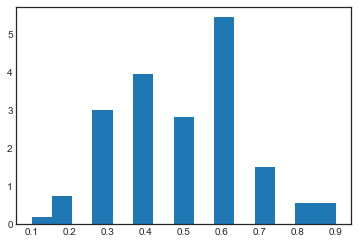

In [101]:
plt.hist(Y[:,9],bins=15,normed=True);

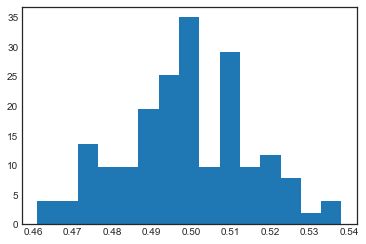

In [102]:
plt.hist(Y[:,p-1],bins=15,normed=True);

In [ ]:
## see end of R solutions for explanation of result